1. Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [25]:
states_all = pd.read_csv("Odevler/Bolum4/states_all.csv")
states_all.columns = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'] 
print(states_all)

ValueError: Length mismatch: Expected axis has 25 elements, new values have 2 elements

In [30]:
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


#Eksik degerler dolayisiyla kutu grafigi yapilamadi.
#Degerleri genel ortalama ile doldurmak 

In [32]:
states_all["TOTAL_EXPENDITURE"].fillna(states_all["TOTAL_EXPENDITURE"].mean(), inplace=True)

In [33]:
states_all["TOTAL_REVENUE"].fillna(states_all["TOTAL_REVENUE"].mean(), inplace=True)

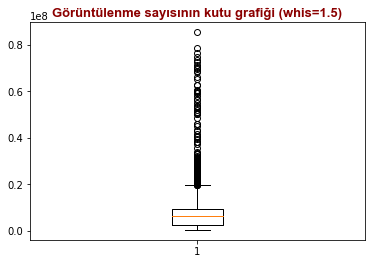

In [34]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(states_all["TOTAL_EXPENDITURE"],)
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [38]:
states_all[['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']].head()


,TOTAL_EXPENDITURE,TOTAL_REVENUE
0,2653798.0,2678885.0
1,972488.0,1049591.0
2,3401580.0,3258079.0
3,1743022.0,1711959.0
4,27138832.0,26260025.0


#Degerleri yillik ortalama ile doldurarak kutu grafigi yapmak

In [44]:
states_all.groupby(by="YEAR").mean()["TOTAL_EXPENDITURE"]
yillaragoreortalama2=states_all.groupby(by="YEAR").mean()["TOTAL_EXPENDITURE"]

In [43]:
states_all.groupby(by="YEAR").mean()["TOTAL_REVENUE"]
yillaragoreortalama1 = states_all.groupby(by="YEAR").mean()["TOTAL_REVENUE"]

In [58]:
states_all["TOTAL_EXPENDITURE"].fillna(yillaragoreortalama1, inplace=True)

In [59]:
states_all["TOTAL_REVENUE"].fillna(yillaragoreortalama2, inplace=True)

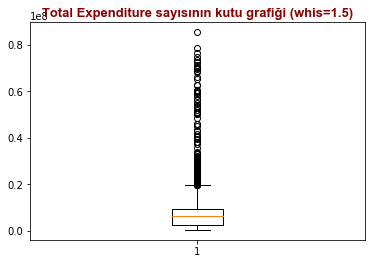

In [60]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(states_all["TOTAL_EXPENDITURE"],)
plt.title("Total Expenditure sayısının kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

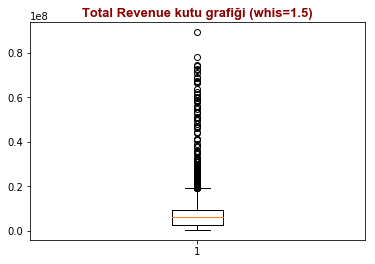

In [61]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(states_all["TOTAL_REVENUE"],)
plt.title("Total Revenue kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

#Genel ortalama ve yil bazli ortalama ile eksik degerlerin doldurulmasi kutu grafiginde bir fark yaratmadi.

#Ayriki degerlerimiz (Ortalama - Tstandart sapma, Ortalama + Tstandart sapma) 

2. Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [62]:
from scipy.stats.mstats import winsorize

In [64]:
winsorize_revenue = winsorize(states_all["TOTAL_REVENUE"], (0,0.10))
winsorize_revenue

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

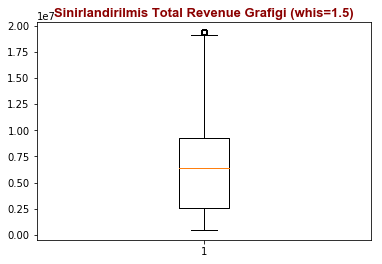

In [65]:
plt.boxplot(winsorize_revenue)
plt.title("Sinirlandirilmis Total Revenue Grafigi (whis=1.5)", fontdict=baslik_font)
plt.show()

3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [67]:
states_all['budget_deficit'] = (states_all['TOTAL_REVENUE'] - states_all['TOTAL_EXPENDITURE']).astype(int)
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,budget_deficit
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,25087
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,77103
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,-878807


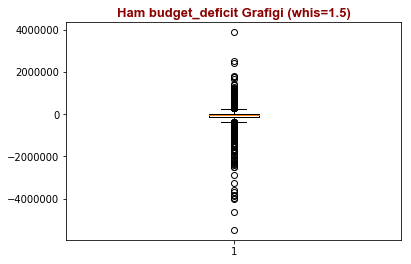

In [73]:
# Yeni degisken budget_deficit aykiri degerler almakta
plt.boxplot(states_all["budget_deficit"])
plt.title("Ham budget_deficit Grafigi (whis=1.5)", fontdict=baslik_font)
plt.show()

In [71]:
winsorize_budget_deficit = winsorize(states_all["budget_deficit"], (0,0.10))
winsorize_budget_deficit

masked_array(data=[  25087,   77103, -143501, ..., -104599, -104599,
                   -104599],
             mask=False,
       fill_value=999999)

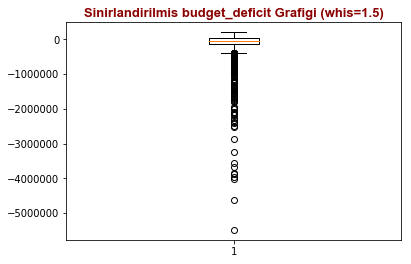

In [77]:
#Sinirlandirma sonrasi halen aykiri degerler mevcut
plt.boxplot(winsorize_budget_deficit)
plt.title("Sinirlandirilmis budget_deficit Grafigi (whis=1.5)", fontdict=baslik_font)
plt.show()

c:\users\ece-yusuf-sekoya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


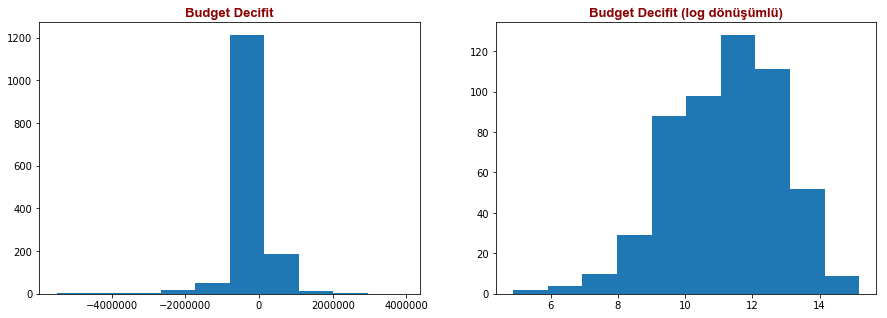

In [84]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(states_all["budget_deficit"])
plt.title("Budget Decifit", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(np.log(states_all["budget_deficit"]))
plt.title("Budget Decifit (log dönüşümlü)", fontdict=baslik_font)
plt.show()


c:\users\ece-yusuf-sekoya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

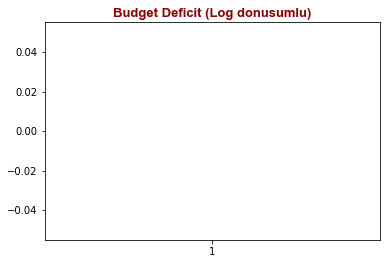

In [86]:
plt.boxplot(np.log(states_all["budget_deficit"]))
plt.title("Budget Deficit (Log donusumlu)", fontdict=baslik_font)
plt.show
